# Ant Colony Optimization Algorithm: Bin-Packing Problem

Implementing the ACOA, which involves simulating artificial ants that iteratively place items into bins based on pheromone trails, adjusting the trails based on the quality of solutions found. Over time, ants converge toward better solutions, leading to the discovery of near-optimal packing configurations.
The optimal solution in this case is defined as the smallest difference between the size of the bags, the goal is to place the items into the bins in such a way as to make the total weight in each bin as nearly equal as possible. 

In [8]:
import random as rn
import numpy as np
import time

def ACO(bins, items, paths, evap_rate, fitness_evals, trials):
    
    '''
    Ant colony optimization algorithm for finding the best fitness for the bin-packing problem.
    Fitness is calculated as the difference between the largest and smallest bin.

    Args:
    
    bins (int) : Number of bins
    items (list(int)) : List of items
    paths (int): Number of ant paths 
    evap_rate (float) : Rate of nodes evaporating
    fitness_evals (int) : Number of fitness evaluations per trial
    trials (int): Number of trials 
    
    Returns:
    
    The best path's fitness found on the final evaluation across all trials.

    '''
    
    # Record single best fitness acheived so far across trials
    best_fitness_across_trials = float('inf')  # Initialize with positive infinity

    for trial in range(trials):
        
        start_time = time.time()
        
        # Set a unique random seed for each trial
        rn.seed(rn.randint(1, 10000))
        
        # Create random pheromones for each node
        pheromone_paths = [[rn.uniform(0, 1) for i in range(len(items))] for x in range(bins)]

        # Determining the amount of times to do the evaluations based on number of paths
        runs = int(fitness_evals / paths)

        for each_run in range(runs):
        
            fitness_list = []
            path_list = []

            for path in range(paths):
            
                path = navigate_path(items, pheromone_paths, bins)
                path_list.append(path)
            
                # Get weights of bins
                bin_list = [0 for y in range(bins)]

                for i in range(len(path)):
                    bin_list[path[i]] += items[i]

                #Find the fitness of the individual path
                fitness_list.append(max(bin_list) - min(bin_list))

            # Update pheromones for  paths
            current_path = 0
            
            for path in path_list:

                current_path_node = 0

                # Calculate the overall fitness of the path.
                pheromone_update = (100 / fitness_list[current_path])

                # Update pheromone path 
                for each_choice in path:

                    pheromone_paths[each_choice][current_path_node] += pheromone_update
                    current_path_node += 1

                current_path += 1

                each_run += 1
        
            # Evaporate nodes 
            pheromone_paths = evaporate(pheromone_paths, evap_rate)

        # Update the best fitness across trials if a better fitness is found
        if min(fitness_list) < best_fitness_across_trials:
            best_fitness_across_trials = min(fitness_list)
            
        
        end_time = time.time()  # Record the end time of the trial
        trial_time = end_time - start_time  # Calculate the time taken for the trial
        
        print(f"Trial {trial + 1} - Best fitness: {best_fitness_across_trials} - Time taken: {trial_time:.4f} seconds")  # Print best fitness and trial time

    print(bin_list)
    return best_fitness_across_trials


def navigate_path(items, pheromones, bins):
    '''
    Function for navigating paths based on pheromones. 
    
    Args:
    
    items (list(int)): List of items in bins
    pheromones (list(list(int))) : List of pheromones on paths
    bins (int) : The number of bins

    Returns:
    
    The path taken by the ant as it navigates its way through the bins

    '''

    path = []

    # Iterate and place items in bins
    for each_item in range(len(items)):

        # Retrieving probability for the next bin
        bin_prob = [bin_prob[each_item] for bin_prob in pheromones]

        choice = rn.uniform(0, sum(bin_prob))
        cumulative_prob = 0
    
        # Choose bin based on probability
        for bin_prob_index in range(len(bin_prob)):
            
            cumulative_prob += bin_prob[bin_prob_index]

            if choice <= cumulative_prob:
                path.append(bin_prob_index)
                break

    return path



def evaporate(pheromones, evap_rate):
    '''
    Evaporates all nodes in pheromone lists

    Args:
    
    pheromones (list(list(int))) : Pheromone list to be updated
    evap_rate (float) : Evaporation rate

    Returns:
    
    The pheromones updated by the evaporation rate.
    '''
    return [[x * evap_rate for x in row] for row in pheromones]



In [4]:
if __name__ == "__main__":
    trials_per_experiment = 5  # Number of trials per experiment

    print("BPP1: Experiment 1")
    print(ACO(10, [i * 2 for i in range(500)], 100, 0.90, 10000, trials_per_experiment))
    
    print("BPP1: Experiment 2")
    print(ACO(10, [i * 2 for i in range(500)], 100, 0.50, 10000, trials_per_experiment))
    
    print("BPP1: Experiment 3")
    print(ACO(10, [i * 2 for i in range(500)], 10, 0.90, 10000, trials_per_experiment))
    
    print("BPP1: Experiment 4")
    print(ACO(10, [i * 2 for i in range(500)], 10, 0.50, 10000, trials_per_experiment))

BPP1: Experiment 1
Trial 1 - Best fitness: 5856 - Time taken: 8.9806 seconds
Trial 2 - Best fitness: 5856 - Time taken: 9.0845 seconds
Trial 3 - Best fitness: 5856 - Time taken: 9.0665 seconds
Trial 4 - Best fitness: 4708 - Time taken: 9.0888 seconds
Trial 5 - Best fitness: 4708 - Time taken: 9.1614 seconds
[34476, 22506, 30132, 27748, 20708, 25030, 23524, 20648, 22420, 22308]
4708
BPP1: Experiment 2
Trial 1 - Best fitness: 5204 - Time taken: 9.1152 seconds
Trial 2 - Best fitness: 5204 - Time taken: 9.1012 seconds
Trial 3 - Best fitness: 4120 - Time taken: 9.0688 seconds
Trial 4 - Best fitness: 4120 - Time taken: 9.1725 seconds
Trial 5 - Best fitness: 4120 - Time taken: 9.1377 seconds
[27960, 30226, 21894, 25818, 22564, 20528, 26934, 23750, 21986, 27840]
4120
BPP1: Experiment 3
Trial 1 - Best fitness: 5782 - Time taken: 9.3347 seconds
Trial 2 - Best fitness: 4642 - Time taken: 9.3144 seconds
Trial 3 - Best fitness: 4642 - Time taken: 9.3728 seconds
Trial 4 - Best fitness: 4188 - Time t

In [5]:
if __name__ == "__main__":
    trials_per_experiment = 5  # Number of trials per experiment
    
    print("BPP2: Experiment 1")
    print(ACO(50, [i * 3 for i in range(500)], 100, 0.90, 10000, trials_per_experiment))
    
    print("BPP2: Experiment 2")
    print(ACO(50, [i * 3 for i in range(500)], 100, 0.50, 10000, trials_per_experiment))
    
    print("BPP2: Experiment 3")
    print(ACO(50, [i * 3 for i in range(500)], 10, 0.90, 10000, trials_per_experiment))
    
    print("BPP2: Experiment 4")
    print(ACO(50, [i * 3 for i in range(500)], 10, 0.50, 10000, trials_per_experiment))

BPP2: Experiment 1
Trial 1 - Best fitness: 9165 - Time taken: 20.6873 seconds
Trial 2 - Best fitness: 8526 - Time taken: 20.9262 seconds
Trial 3 - Best fitness: 7431 - Time taken: 20.8801 seconds
Trial 4 - Best fitness: 7431 - Time taken: 21.1424 seconds
Trial 5 - Best fitness: 7431 - Time taken: 20.9967 seconds
[2661, 7398, 10563, 6588, 10209, 8664, 5856, 3132, 8088, 4983, 6153, 2829, 14679, 13179, 8427, 6294, 8250, 2619, 1254, 6291, 6333, 6849, 7932, 7731, 6618, 7947, 12690, 9684, 7773, 5964, 6150, 3945, 4413, 10572, 14712, 4092, 13455, 9096, 3462, 9552, 6723, 7260, 8874, 7389, 10062, 5043, 7515, 6390, 10536, 7371]
7431
BPP2: Experiment 2
Trial 1 - Best fitness: 7497 - Time taken: 21.0300 seconds
Trial 2 - Best fitness: 7497 - Time taken: 21.0669 seconds
Trial 3 - Best fitness: 7497 - Time taken: 21.1303 seconds
Trial 4 - Best fitness: 7497 - Time taken: 20.9916 seconds
Trial 5 - Best fitness: 7497 - Time taken: 21.2235 seconds
[6489, 10125, 7875, 6330, 4572, 7671, 5751, 6453, 10254,

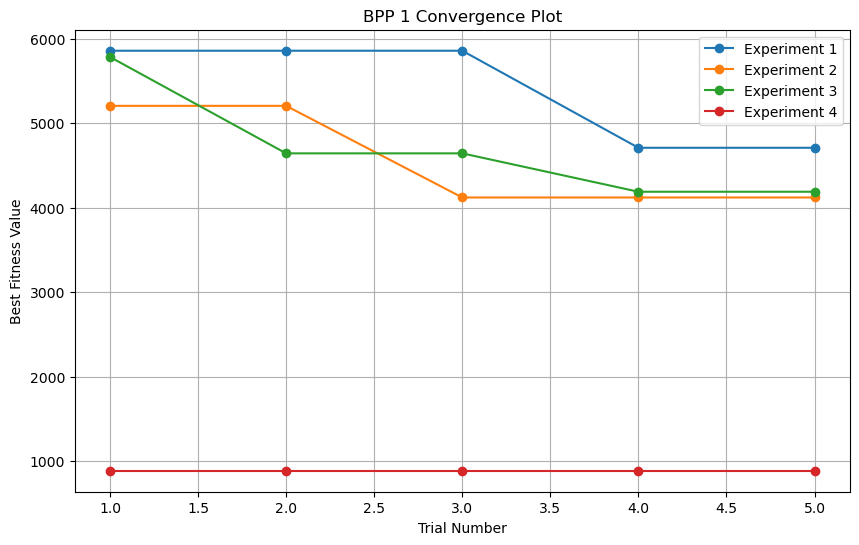

In [1]:
import matplotlib.pyplot as plt

def convergence_plot(experiment_results):
    plt.figure(figsize=(10, 6))
    
    for experiment_num, best_fitness_per_trial in enumerate(experiment_results, start=1):
        plt.plot(range(1, len(best_fitness_per_trial) + 1), best_fitness_per_trial, marker='o', label=f'Experiment {experiment_num}')

    plt.xlabel('Trial Number')
    plt.ylabel('Best Fitness Value')
    plt.title('BPP 1 Convergence Plot')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
experiment1_results = [5856,5856,5856,4708,4708]
experiment2_results = [5204,5204,4120,4120,4120]
experiment3_results = [5782,4642,4642,4188,4188]
experiment4_results = [888,888,888,888,888]

all_experiment_results = [experiment1_results, experiment2_results, experiment3_results, experiment4_results]

convergence_plot(all_experiment_results)

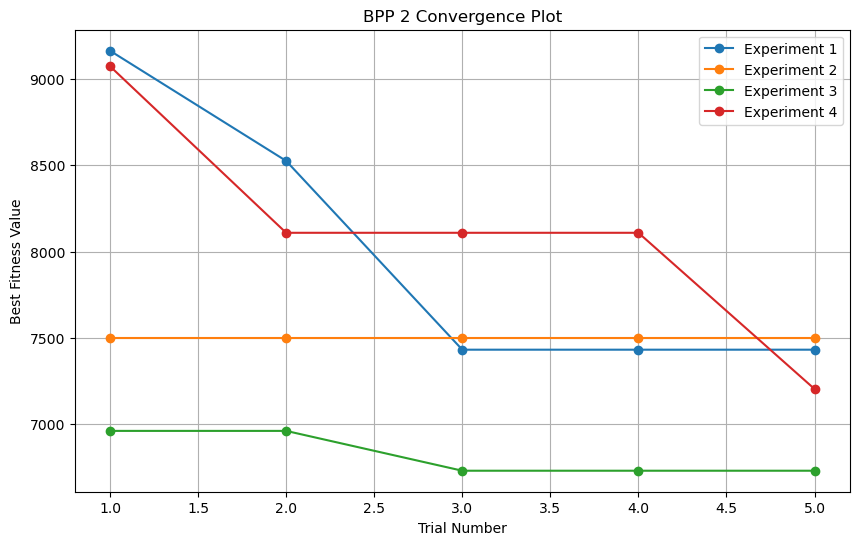

In [2]:
def convergence_plot(experiment_results):
    plt.figure(figsize=(10, 6))
    
    for experiment_num, best_fitness_per_trial in enumerate(experiment_results, start=1):
        plt.plot(range(1, len(best_fitness_per_trial) + 1), best_fitness_per_trial, marker='o', label=f'Experiment {experiment_num}')

    plt.xlabel('Trial Number')
    plt.ylabel('Best Fitness Value')
    plt.title('BPP 2 Convergence Plot')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
experiment1_results = [9165,8526,7431,7431,7431]
experiment2_results = [7497,7497,7497,7497,7497]
experiment3_results = [6960,6960,6729,6729,6729]
experiment4_results = [9075,8109,8109,8109,7203]

all_experiment_results = [experiment1_results, experiment2_results, experiment3_results, experiment4_results]

convergence_plot(all_experiment_results)

***Reference:***

Some of the functions I used were inspired and adapted by a similar implementation of the ACO algorithm that can be found here:

https://github.com/Enchando/Ant-Colony-Optimisation/tree/master